     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        101             58             17      265  24.2   
1        108             70              0        0  30.5   
2        148             60             27      318  30.9   
3        113             76              0        0  33.3   
4         83             86             19        0  29.3   
..       ...            ...            ...      ...   ...   
681      111             62              0        0  22.6   
682      122             90             51      220  49.7   
683       77             56             30       56  33.3   
684       75             64             24       55  29.7   
685      100             54             28      105  37.8   

     DiabetesPedigreeFunction  PatientID  Outcome  
0                       0.614       1017        0  
1                       0.955       1031        1  
2                       0.150       1033        1  
3                       0.278       1035        1  
4      

,PatientID,PregnancyRecordID
0,1017,7119
1,1017,7120
2,1031,7217
3,1031,7218
4,1031,7219
...,...,...
3055,17728,124099
3056,17877,125139
3057,17877,125140
3058,17877,125141


Glucose mean:120.65160349854227
Glucose median:117.0
Insulin max:846
BMI max:67.1
BloodPressure max:122
Number of rows  686
Number of columns  8
Standard deviation for all columns
 Glucose                       31.857707
BloodPressure                 19.040706
SkinThickness                 15.944848
Insulin                      117.712149
BMI                            7.946174
DiabetesPedigreeFunction       0.328851
PatientID                   4890.669582
Outcome                        0.476810
dtype: float64
Standard deviation for glucose: 31.85770674698452


/Users/keselmap/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


           PregnancyRecordID
PatientID                   
1017                       2
1031                       8
1033                       4
1048                       4
1074                       1
...                      ...
17877                      4
17903                      1
17920                      1
17963                      2
17995                      2

[675 rows x 1 columns]
Correlation of Glucose, Insulin and BloodPressure:
                 Glucose   Insulin  BloodPressure  PatientAge
Glucose        1.000000  0.346204       0.151477    0.280342
Insulin        0.346204  1.000000       0.076375   -0.051447
BloodPressure  0.151477  0.076375       1.000000    0.246575
PatientAge     0.280342 -0.051447       0.246575    1.000000
     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        101             58             17      265  24.2   
1        108             70              0        0  30.5   
2        148             60             27      318  30.9  

<AxesSubplot:>

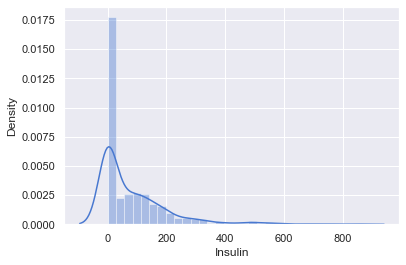

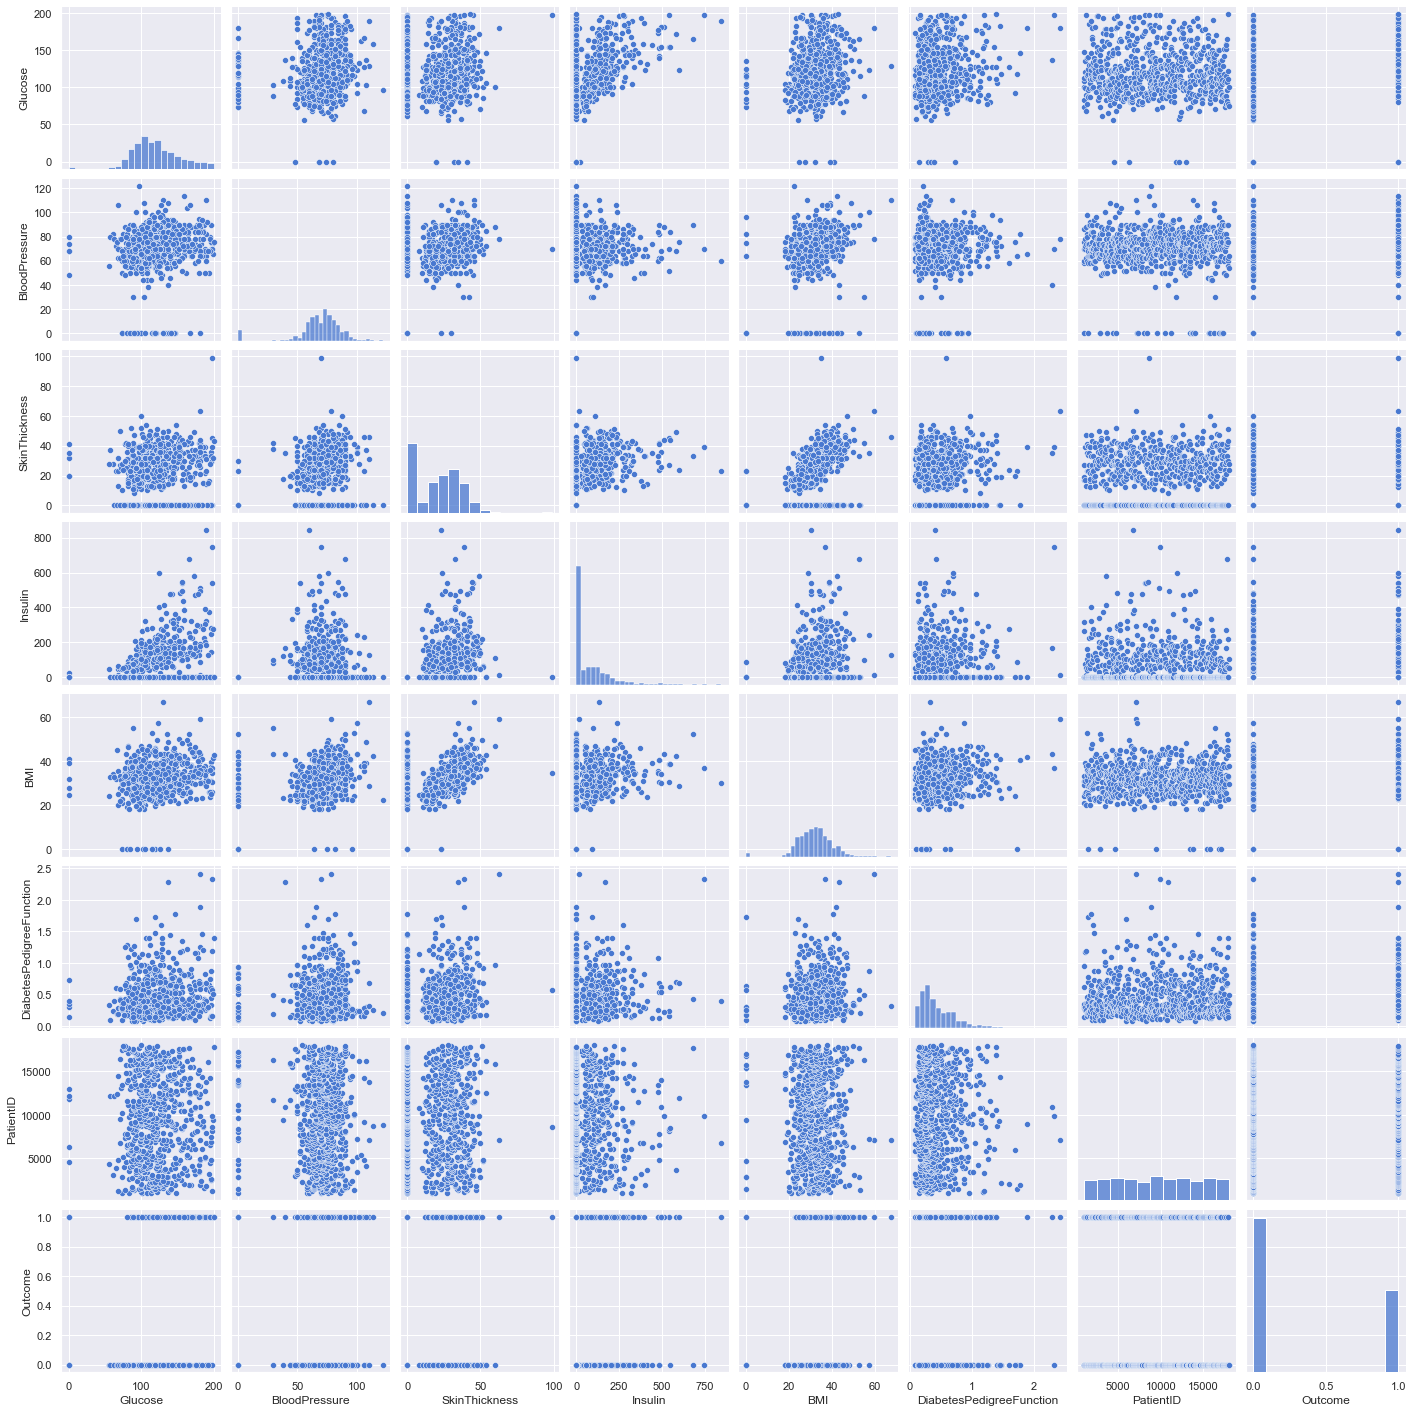

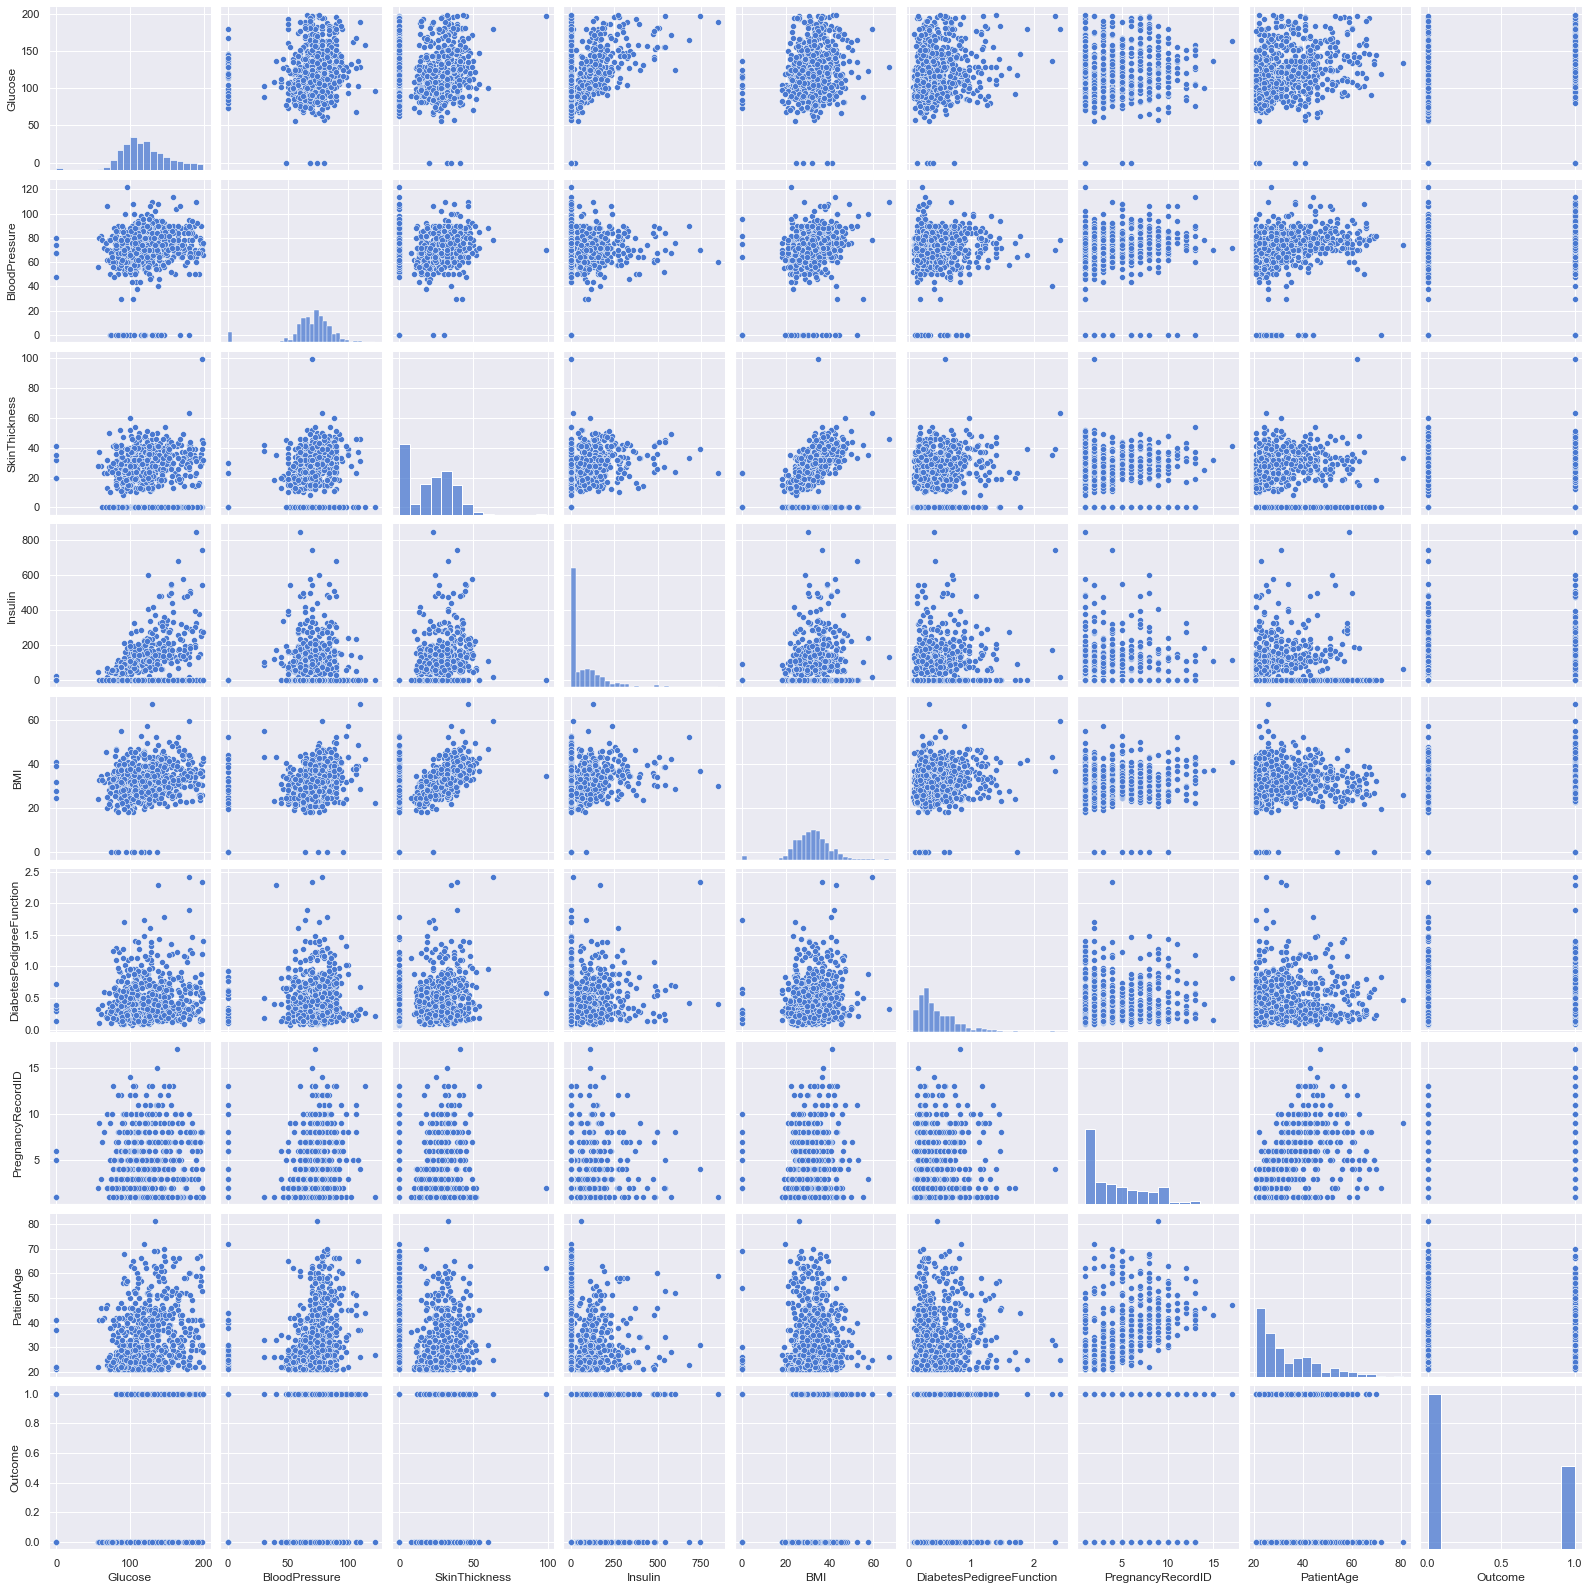

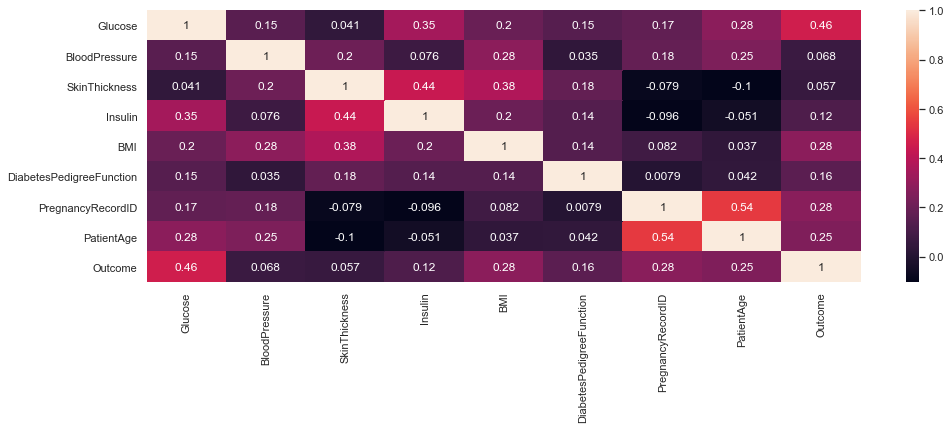

In [35]:
import pandas as pd
diabetes=pd.read_csv("diabetes.csv")
patient=pd.read_csv("patient_data.csv")
pregnancies=pd.read_csv("pregnancies_records.csv")
print('Glucose mean:' + str(diabetes.Glucose.mean()))
print('Glucose median:' + str(diabetes.Glucose.median()))
print('Insulin max:' + str(diabetes.Insulin.max()))
print('BMI max:' + str(diabetes.BMI.max()))
print('BloodPressure max:' + str(diabetes.BloodPressure.max()))
print("Number of rows ", len(diabetes.index))
print("Number of columns ",len(diabetes.columns))
print("Standard deviation for all columns\n", diabetes.std())

import numpy as np
import seaborn as sns
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

print("Standard deviation for glucose:", np.std(diabetes['Glucose'], ddof=1))

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
sns.distplot(diabetes["Insulin"].dropna());

sns.pairplot(diabetes)

pregnancies_grouped_by_patient = pregnancies.groupby("PatientID").agg({"PregnancyRecordID": "count"})
print(pregnancies_grouped_by_patient)
combined_data = pd.merge(pd.merge(diabetes, patient, on="PatientID", how="left"), pregnancies_grouped_by_patient, on="PatientID", how="left")

year = date.today().year
combined_data['PatientAge']=year-combined_data['BirthYear']
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'PregnancyRecordID', 'PatientAge', 'Outcome']

print("Correlation of Glucose, Insulin and BloodPressure:\n",combined_data[["Glucose", "Insulin", "BloodPressure", "PatientAge"]].corr())


diabetes_features = combined_data[numerical_features]
sns.pairplot(diabetes_features)
print(combined_data)

plt.figure(figsize=(16,5))
sns.heatmap(diabetes_features.corr(), annot=True)


In [1]:
diabetes.describe().T

NameError: name 'diabetes' is not defined

In [3]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,686.0,120.651603,31.857707,0.000,99.00000,117.0000,140.000,199.00
BloodPressure,686.0,69.448980,19.040706,0.000,64.00000,72.0000,80.000,122.00
SkinThickness,686.0,20.634111,15.944848,0.000,0.00000,23.0000,32.000,99.00
Insulin,686.0,80.583090,117.712149,0.000,0.00000,26.0000,127.750,846.00
BMI,686.0,31.974781,7.946174,0.000,27.30000,32.0000,36.600,67.10
DiabetesPedigreeFunction,686.0,0.469886,0.328851,0.078,0.24525,0.3705,0.618,2.42
PatientID,686.0,9529.288630,4890.669582,1017.000,5189.75000,9446.0000,13685.750,17995.00
Outcome,686.0,0.348397,0.476810,0.000,0.00000,0.0000,1.000,1.00
